In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import seaborn as sns

import warnings as wn
wn.filterwarnings('ignore')

In [20]:
df_main = pd.read_csv('ESSdata_Thinkful.csv')

In [21]:
df_main.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [22]:
id_check = df_main[df_main['idno'] == 5]

In [23]:
df_main['year'].unique()

array([6, 7], dtype=int64)

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [24]:
data_2012 = df_main[df_main['year'] == 6]
data_2012.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [25]:
data_2014 = df_main[df_main['year'] == 7]
data_2014.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
773,CH,5.0,7,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0
774,CH,25.0,7,4.0,4.0,2.0,5.0,6.0,5.0,3.0,1.0,30.0,1.0
775,CH,26.0,7,3.0,8.0,8.0,6.0,8.0,7.0,5.0,2.0,49.0,2.0
776,CH,28.0,7,2.0,7.0,7.0,5.0,9.0,6.0,2.0,1.0,51.0,1.0
777,CH,29.0,7,2.0,4.0,7.0,0.0,8.0,6.0,2.0,2.0,32.0,2.0


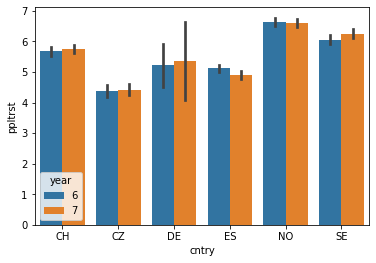

In [29]:
sns.barplot(x='cntry', y='ppltrst', hue='year', data=df_main)

					Distribution of Trust


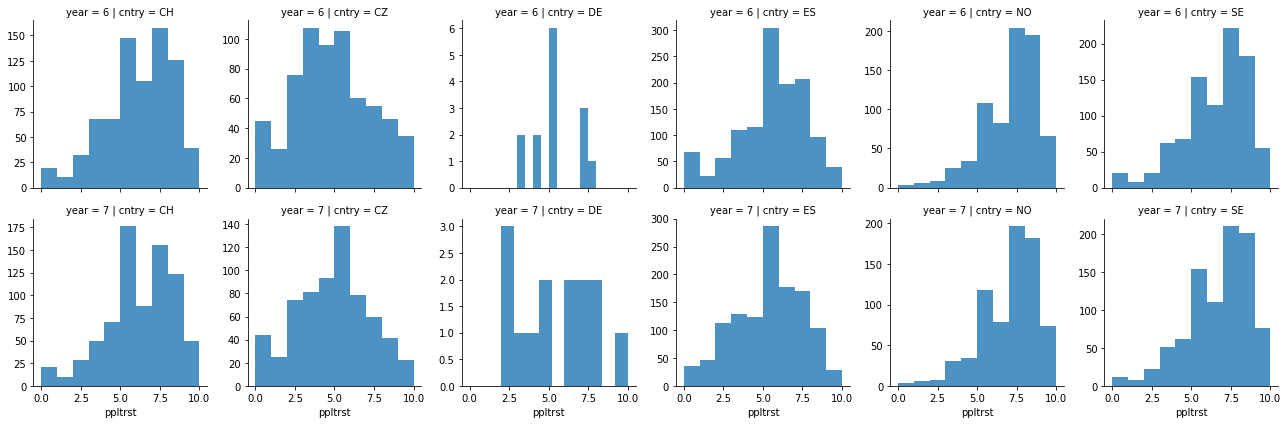

In [31]:
# Plotting histograms of trust for each country for each year
g = sns.FacetGrid(df_main, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'ppltrst', alpha=0.8)
print('\t\t\t\t\tDistribution of Trust')
plt.show()


In [33]:
data=df_main

In [35]:

# Import parametric statistics
from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
# Import nonparametric statistics
from scipy.stats import kruskal, wilcoxon
# Import test for normality
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [36]:
 #Testing each country and each year to determine if trust is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(data.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    data_temp = data[data.cntry ==cnt].dropna()
    for year in years:
        # Printing Shapiro test results
        print(cnt, year, shapiro(data_temp[data_temp.year ==year].ppltrst))
    print()

Shapiro Tests for Normality
CH 6 (0.9517108201980591, 9.511383786695374e-15)
CH 7 (0.9547930955886841, 2.4654701498145852e-14)

CZ 6 (0.9680074453353882, 3.6126571179018185e-10)
CZ 7 (0.9715777039527893, 1.8779569010973773e-09)

DE 6 (0.8929170966148376, 0.1069343090057373)
DE 7 (0.9425466060638428, 0.4519253373146057)

ES 6 (0.949491024017334, 1.6942651933374377e-19)
ES 7 (0.9663601517677307, 1.5275811452092943e-15)

NO 6 (0.9211018085479736, 8.881221102071063e-19)
NO 7 (0.9292042255401611, 7.92943027973029e-18)

SE 6 (0.9367397427558899, 1.2586250953636158e-18)
SE 7 (0.9376322627067566, 1.3852298444033788e-18)



If the value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution. In our case it is below 0.05 so our data is not normal (we reject the null hypothesis) 

In [37]:
# Wilcoxon Signed Rank Test for each country between years.
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    data_temp = data[data.cntry ==cnt]
    # Printing Shapiro test results
    print(cnt, wilcoxon(data_temp[data_temp.year == 6].ppltrst, 
                        y=data_temp[data_temp.year == 7].ppltrst))
    print()

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

CZ WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

DE WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

ES WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

NO WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

SE WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)



 Spain and Sweden show a difference in trust from 2012 to 2014, however only Spain shows that they are less trusting.

2

					Distribution of Happiness


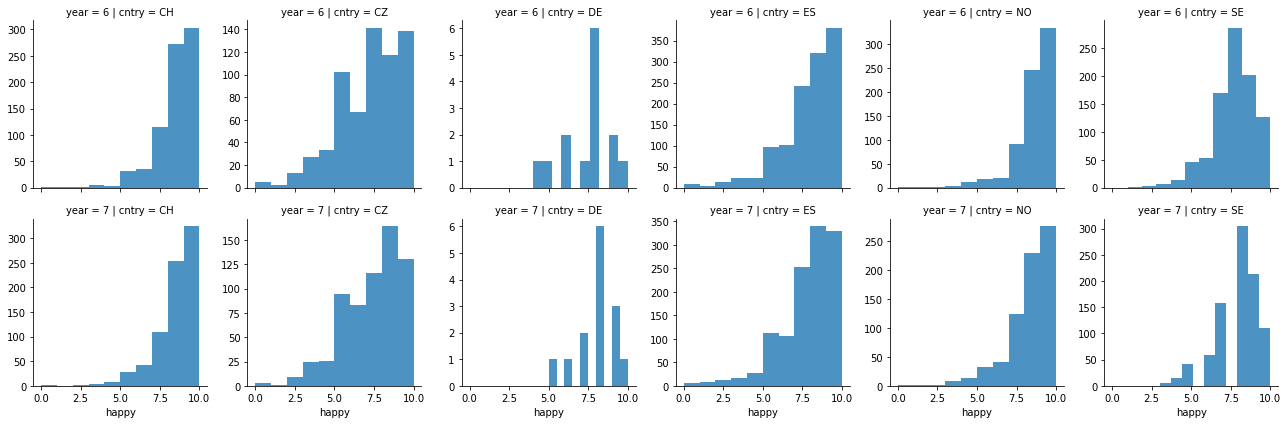

Shapiro Tests for Normality
CH 6 (0.8773602843284607, 1.4611401593361174e-23)
CH 7 (0.8950787782669067, 4.273768685964887e-22)

CZ 6 (0.9462587833404541, 5.939277796787254e-14)
CZ 7 (0.944864809513092, 3.1645106863707403e-14)

DE 6 (0.9160984754562378, 0.22211012244224548)
DE 7 (0.9213663339614868, 0.23006466031074524)

ES 6 (0.9052610397338867, 3.4151276945678624e-26)
ES 7 (0.9136462211608887, 6.898763644671094e-25)

NO 6 (0.8498518466949463, 2.291937245544563e-25)
NO 7 (0.8795286417007446, 4.680781911775775e-23)

SE 6 (0.9025380611419678, 5.918160728712866e-23)
SE 7 (0.9121034145355225, 5.600535793318595e-22)



In [38]:
# Plotting histograms of trust for each country for each year
g = sns.FacetGrid(data, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'happy', alpha=0.8)
print('\t\t\t\t\tDistribution of Happiness')
plt.show()

# Testing each country and each year to determine if trust is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(data.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    data_temp = data[data.cntry ==cnt].dropna()
    for year in years:
        # Printing Shapiro test results
        print(cnt, year, shapiro(data_temp[data_temp.year ==year].happy))
    print()

In [39]:
# Wilcoxon Signed Rank Test for each country between years.

print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    data_temp = data[data.cntry ==cnt]
    
    # Printing Shapiro test results
    print(cnt, wilcoxon(data_temp[data_temp.year == 6].happy,
                       y=data_temp[data_temp.year == 7].happy))
    print()

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

CZ WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

ES WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

NO WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

SE WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)



Spain  and Chezh REpublic show significant differences